# Learning Simulations
These are my notes for going through the excercises in the neuronal dynamics textbook.


In [1]:
# Import brian
from brian2 import *
# data frame support and `tidy` plotting
import pandas as pd
import  numpy
import seaborn
#activate inline use of matplotlib
%matplotlib inline

Define a very simple neuron with this syntax.
The text in the apostrophe environment are the differential equations that define the behaviour.


In [2]:
tau = 10*ms             # a time constant
eqs = '''
dv/dt = (1-v)/tau : 1
'''

Now we can put the equation into a neuron.
The equation formally typed out:
\begin{equation}
\frac{\partial v}{\partial t} = \frac{(1-v)}{\tau}
\end{equation}
This equation is a simple exponential decay with $\tau$ time constant.

\begin{equation}
v(t) = 1-\exp\left(\frac{-t}{\tau}\right)
\end{equation}


Next we assign a Neuron with that voltage equation.
Neurons are always assigned as a neuron group.

In [3]:
G = NeuronGroup(1, eqs)

Now we can simulate the timecourse with the run command.

In [4]:
run(100*ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.03s). [brian2.stateupdaters.base.method_choice]


Next, we would like to simulate and look at different aspects of the model as it evolves in time.
Variables of the model at a given point in time are referred to as *states* by brian.
The following block simulates and records the time course of voltage based on the model (it should just be an exponential asymptote to 1)



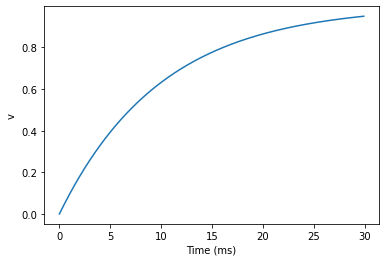

In [5]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

State monitor objects are used to store the information of a run.
The neurons have to be specified (here: `record = 0` option) in order to preserve memory.

Now we can introduce spiking behaviour.
Whenever the threshold is reached, voltage gets set to 0, and decays with the defined equation.
These can both be specified in the neuron specification.

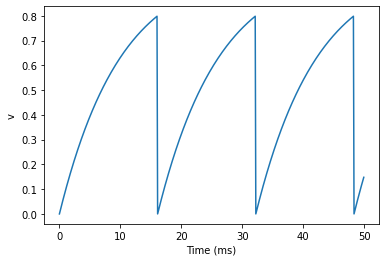

In [18]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=True)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

`StateMonitor` are 2D arrays with the index of the neuron, and the value of the timecourse.
This *should* lend itself to create tidy dataframes from this.
It can be done with the `get.states` syntax (requires pandas).

In [20]:
test = M.get_states(['t','v'[0]], units =False)
#test
#len(M.v[0])
pd.DataFrame({
    'N': len(M.v),
    't': M.t,
    'V': M.v[0]})


,N,t,V
0,1,0.0000,0.000000
1,1,0.0001,0.009950
2,1,0.0002,0.019801
3,1,0.0003,0.029554
4,1,0.0004,0.039211
...,...,...,...
495,1,0.0495,0.113080
496,1,0.0496,0.121905
497,1,0.0497,0.130642
498,1,0.0498,0.139292


This produces the output I want from this one, but is not quite what I want yet, we can go back to it.
Want to have a tidy format dataframe generated from a `StateMonitor` call that can handle multiple variables and neurons.
Should be doable with for loops.

Pseudocode:

* For each neuron in number_neurons
    - do a call to get states that produces a tidy output for that neuron
* then append these tidy frames to each other with a neuron index variable
* assign that to the main environment

Seaborn is the graphing library that should come close to functionaity to ggplot and has a tidy working paradigm.
Try to explore the tidy set created.